# Histogram/Distribution plots for airflows

## Import dependencies and data

In [1]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plotting\\plots\\'

In [3]:
# set seaborn style/theme
sns.set_theme()
sns.set_style('white')

In [23]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=[0, 1, 2, 3, 4]
)

# convert index.date col to datetime
#data.index = pd.to_datetime(data.index.values)
data.loc[:, ('time', 'date')] = pd.to_datetime(data.time.date)

In [24]:
# keep only ...
data = data[[
    'setpoints',
    'state',
    'temperatures',
    'sun',
    'time'
]].copy()

# # filter out variables
# data = data.filter(
#     regex='DC_SP.*_absolute|TA01_GP101|TA01_SP102.*_absolute', 
#     axis=1
# )

In [25]:
data = data[[
    (   'setpoints',       'TA01_SP101'),
    (   'setpoints',       'TA01_SP102'),
    (       'state',      'TA01_output'),
    ('temperatures', 'TA01_GT10X_GM10X'),
    (         'sun',        'gsi_deriv'),
    (        'time',             'date')
]].copy()

data.columns = data.columns.droplevel(0)
data.index = data.date
del data['date']

In [9]:
# data = data[[
#     (   'setpoints', 'TA01_GT10X_GM10X'),
#     ('temperatures', 'TA01_GT10X_GM10X'),
#     (        'time',             'date')
# ]].copy()

# data.columns = data.columns.droplevel(1)
# data.index = data.time
# del data['time']

## Plot distributions for airflows

In [10]:
data.mean()

category
setpoints       20.698046
temperatures    20.788953
dtype: float64

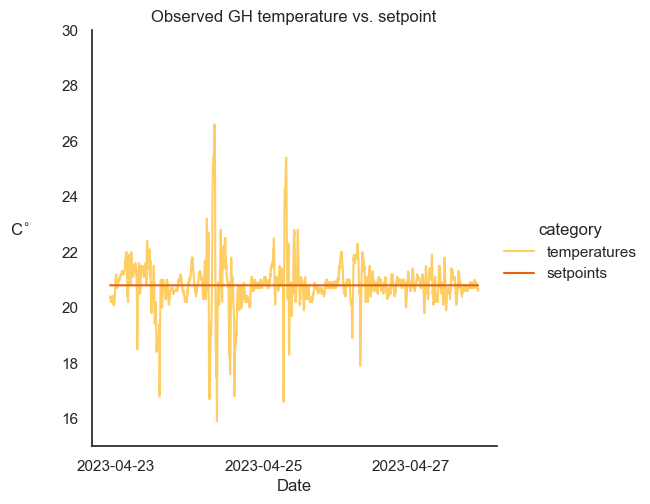

In [22]:
subset = data[[
    'temperatures',
    'setpoints',
]].copy()

ax = sns.relplot(
    data=subset.iloc[-14400:], 
    kind='line', 
    legend='full',
    palette='YlOrBr',
    markers=False,
    dashes=False,
    linewidth=1.5,
    alpha=1.0
)

ax.set_xticklabels(step=2)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('C$^{\circ}$', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
plt.ylim(15, 30)
plt.title('Observed GH temperature vs. setpoint')

fpath = plot_path + 'temp_setp_ex.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

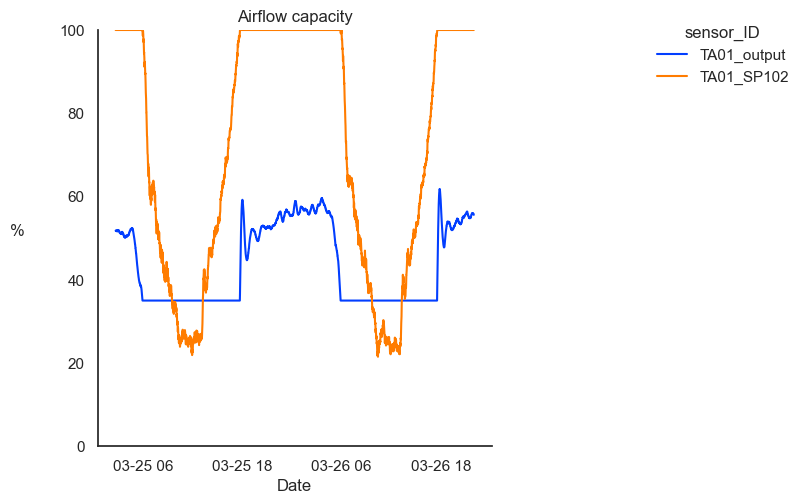

In [183]:
subset = data[[
    'TA01_output',
    'TA01_SP102',
#     'TA01_SP101'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-5200:], 
    kind='line', 
    legend='full',
    palette='bright',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('%', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
plt.ylim(0, 100)
plt.title('Airflow capacity')

fpath = plot_path + 'flow_ex_1.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

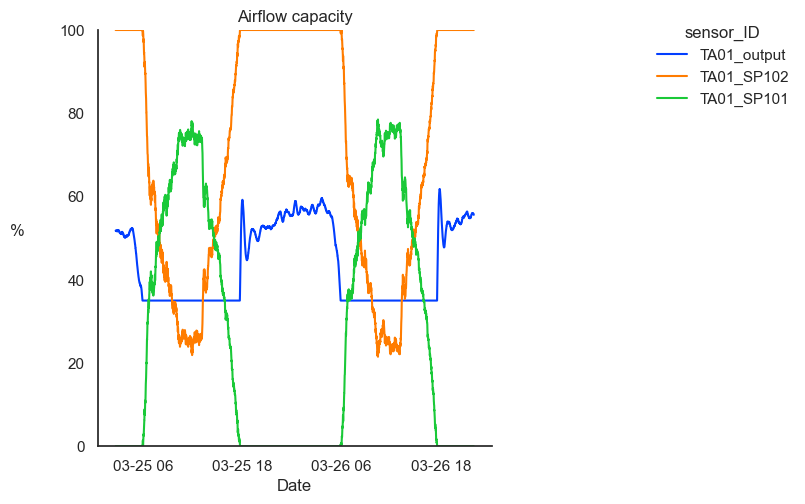

In [184]:
subset = data[[
    'TA01_output',
    'TA01_SP102',
    'TA01_SP101'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-5200:], 
    kind='line', 
    legend='full',
    palette='bright',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('%', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
plt.ylim(0, 100)
plt.title('Airflow capacity')

fpath = plot_path + 'flow_ex_2.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

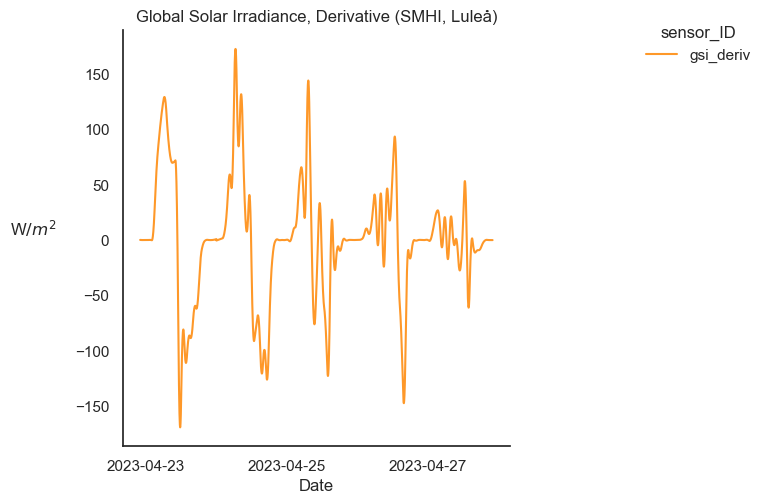

In [28]:
subset = data[[
    'gsi_deriv'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-14400:], 
    kind='line', 
    legend='full',
    palette='YlOrBr',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('W$/m^2$', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
#plt.ylim(0, 100)
plt.title('Global Solar Irradiance, Derivative (SMHI, Luleå)')

fpath = plot_path + 'flow_ex_3.png'
# plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

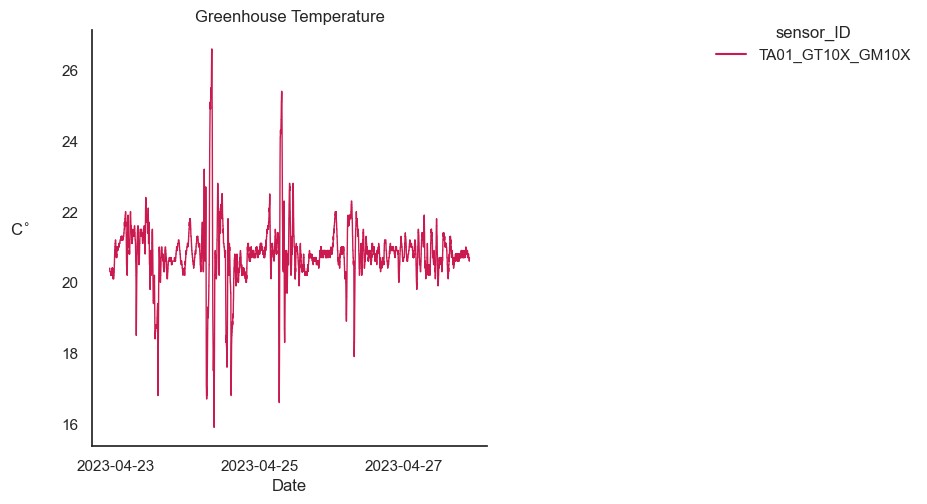

In [30]:
subset = data[[
    'TA01_GT10X_GM10X'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-14400:], 
    kind='line', 
    linewidth=1.0,
    legend='full',
    palette='rocket_r',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('C$^{\circ}$', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
#plt.ylim(0, 100)
plt.title('Greenhouse Temperature')

fpath = plot_path + 'flow_ex_4.png'
# plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

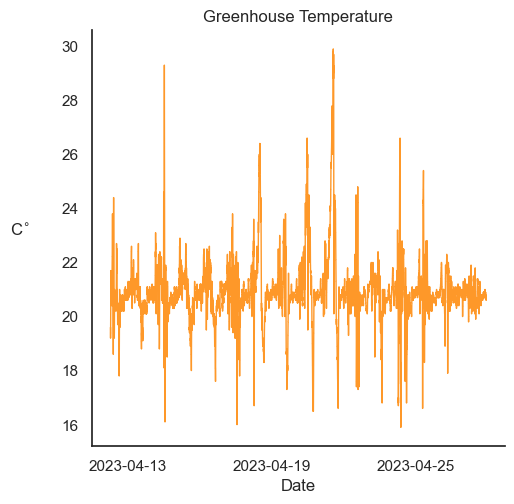

In [21]:
subset = data[[
    'TA01_GT10X_GM10X'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-45000:], 
    kind='line', 
    linewidth=1.0,
    legend=False,
    palette='YlOrBr',
    markers=False,
    dashes=False,
)

ax.set_xticklabels(step=3)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('C$^{\circ}$', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
#plt.ylim(0, 100)
plt.title('Greenhouse Temperature')

fpath = plot_path + 'GH_temp_4.png'
plt.savefig(fpath, bbox_inches='tight', dpi=200)
plt.show()

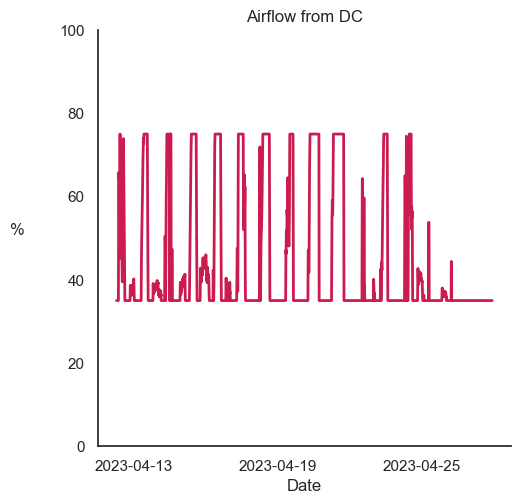

In [105]:
subset = data[[
    'TA01_output'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-45000:], 
    kind='line', 
    linewidth=2.0,
    legend=False,
    palette='rocket',
    markers=False,
    dashes=False,
)

ax.set_xticklabels(step=3)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('%', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
plt.ylim(0, 100)
plt.title('Airflow from DC')

fpath = plot_path + 'GH_flow_4.png'
plt.savefig(fpath, bbox_inches='tight', dpi=200)
plt.show()

## DIST plots

In [50]:
subset = data.groupby('month').agg({
    'TA01_output':['mean', 'std'],
    'TA01_GT10X_GM10X':['mean', 'std'],
})

In [51]:
subset

sensor_ID TA01_output            TA01_GT10X_GM10X          
                 mean        std             mean       std
month                                                      
1           41.557911   7.734717        19.969293  0.423195
2           39.350848   6.175613        20.681818  1.063177
3           41.244909   8.834743        21.344679  1.806612
4           44.385421  14.759683        20.877398  1.835598
12          51.117440   9.322905        21.433177  0.999538

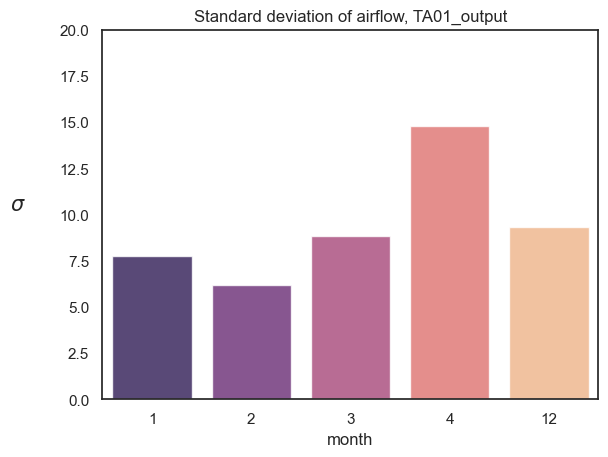

In [86]:
sns.barplot(
    x=subset.index, 
    y=subset[('TA01_output', 'std')].values,
    palette='magma',
    alpha=0.8
)

plt.ylim(0, 20)
plt.ylabel('$\sigma$', rotation=0, fontsize=15, labelpad=30)
plt.title('Standard deviation of airflow, TA01_output')
plt.savefig(plot_path + 'ta01_output_std.png', dpi=200, bbox_inches='tight')
plt.show()

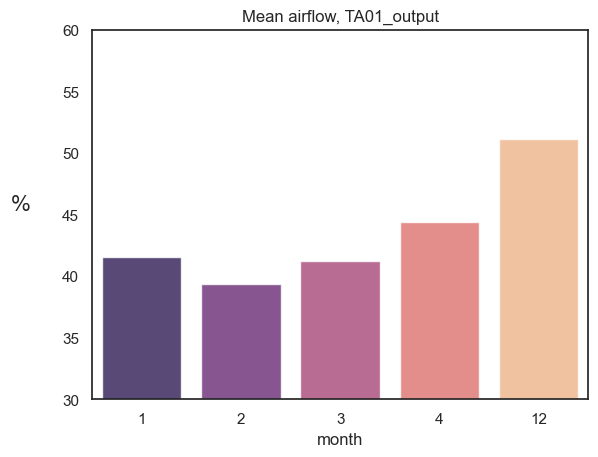

In [87]:
sns.barplot(
    x=subset.index, 
    y=subset[('TA01_output', 'mean')].values,
    palette='magma',
    alpha=0.8
)

plt.ylim(30, 60)
plt.ylabel('$\%$', rotation=0, fontsize=15, labelpad=30)
plt.title('Mean airflow, TA01_output')
plt.savefig(plot_path + 'ta01_output_mean.png', dpi=200, bbox_inches='tight')
plt.show()

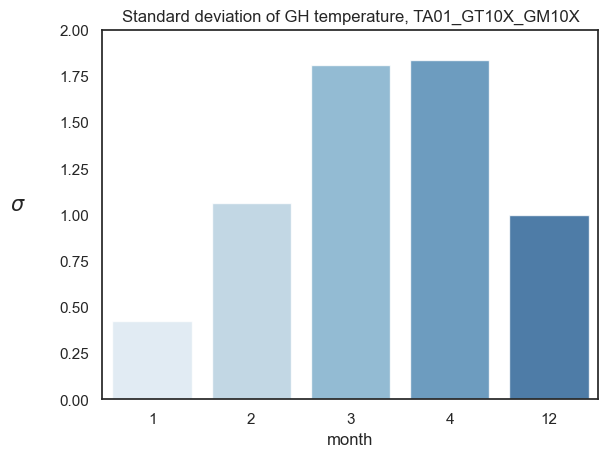

In [88]:
sns.barplot(
    x=subset.index, 
    y=subset[('TA01_GT10X_GM10X', 'std')].values,
    palette='Blues',
    alpha=0.8
)

plt.ylim(0, 2)
plt.ylabel('$\sigma$', rotation=0, fontsize=15, labelpad=30)
plt.title('Standard deviation of GH temperature, TA01_GT10X_GM10X')
plt.savefig(plot_path + 'ta01_temp_std.png', dpi=200, bbox_inches='tight')
plt.show()

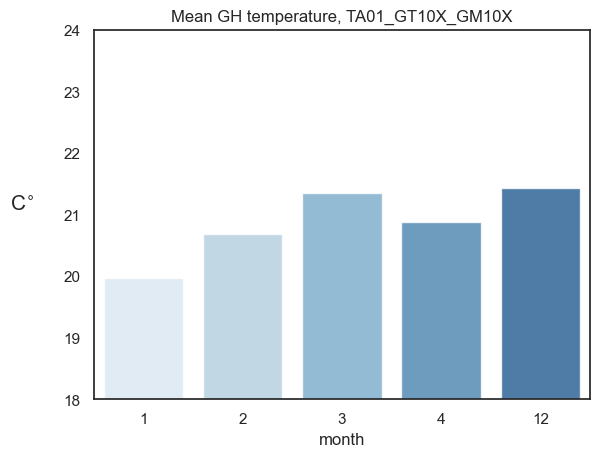

In [89]:
sns.barplot(
    x=subset.index, 
    y=subset[('TA01_GT10X_GM10X', 'mean')].values,
    palette='Blues',
    alpha=0.8
)

plt.ylim(18, 24)
plt.ylabel('C$^{\circ}$', rotation=0, fontsize=15, labelpad=30)
plt.title('Mean GH temperature, TA01_GT10X_GM10X')
plt.savefig(plot_path + 'ta01_temp_mean.png', dpi=200, bbox_inches='tight')
plt.show()